In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('ohio_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_deaths_50_lag', 'new_cases_10_mean', 'new_cases_3_lag', 'dew_point', 'current_intensive_care_patients', 'new_deaths_30_lag', 'new_cases_150_lag', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_2_lag', 'new_deaths_4_lag', 'new_cases_50_std', 'new_deaths_3_lag', 'new_cases_4_lag', 'new_deaths_7_lag', 'new_cases_10_min', 'relative_humidity', 'new_hospitalized_patients', 'new_cases_7_lag', 'new_cases_2_lag', 'new_deaths_1_lag', 'new_cases_10_max', 'new_deaths_100_std', 'new_cases_1 lag', 'average_temperature_celsius']]
covid_test = covid_test[['y', 'new_deaths_50_lag', 'new_cases_10_mean', 'new_cases_3_lag', 'dew_point', 'current_intensive_care_patients', 'new_deaths_30_lag', 'new_cases_150_lag', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_2_lag', 'new_deaths_4_lag', 'new_cases_50_std', 'new_deaths_3_lag', 'new_cases_4_lag', 'new_deaths_7_lag', 'new_cases_10_min', 'relative_humidity', 'new_hospitalized_patients', 'new_cases_7_lag', 'new_cases_2_lag', 'new_deaths_1_lag', 'new_cases_10_max', 'new_deaths_100_std', 'new_cases_1 lag', 'average_temperature_celsius']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4525.84349	validation_1-rmse:10798.36851
[1]	validation_0-rmse:4484.72989	validation_1-rmse:10722.49372
[2]	validation_0-rmse:4444.02766	validation_1-rmse:10647.46443
[3]	validation_0-rmse:4403.73322	validation_1-rmse:10573.28057
[4]	validation_0-rmse:4363.84197	validation_1-rmse:10499.91763
[5]	validation_0-rmse:4324.35017	validation_1-rmse:10427.37797
[6]	validation_0-rmse:4285.25354	validation_1-rmse:10355.66675
[7]	validation_0-rmse:4246.54881	validation_1-rmse:10284.79904
[8]	validation_0-rmse:4208.23044	validation_1-rmse:10214.78273
[9]	validation_0-rmse:4170.29674	validation_1-rmse:10145.59585
[10]	validation_0-rmse:4132.74118	validation_1-rmse:10077.16130
[11]	validation_0-rmse:4095.56460	validation_1-rmse:10009.42963
[12]	validation_0-rmse:4058.75862	validation_1-rmse:9942.22909
[13]	validation_0-rmse:4022.32274	validation_1-rmse:9876.11618
[14]	validation_0-rmse:3986.25319	validation_1-rmse:9810.42651
[15]	validation_0-rmse:3950.54636	validation_1-rmse:9

[130]	validation_0-rmse:1479.37038	validation_1-rmse:6023.98498
[131]	validation_0-rmse:1467.42178	validation_1-rmse:6012.24537
[132]	validation_0-rmse:1455.63365	validation_1-rmse:6000.04519
[133]	validation_0-rmse:1443.90064	validation_1-rmse:5988.28935
[134]	validation_0-rmse:1432.33652	validation_1-rmse:5977.08963
[135]	validation_0-rmse:1420.79242	validation_1-rmse:5965.73797
[136]	validation_0-rmse:1409.45236	validation_1-rmse:5954.30848
[137]	validation_0-rmse:1398.32593	validation_1-rmse:5944.08534
[138]	validation_0-rmse:1387.15660	validation_1-rmse:5934.68278
[139]	validation_0-rmse:1376.04154	validation_1-rmse:5924.26060
[140]	validation_0-rmse:1365.19557	validation_1-rmse:5915.04447
[141]	validation_0-rmse:1354.32449	validation_1-rmse:5904.76195
[142]	validation_0-rmse:1343.61403	validation_1-rmse:5895.19824
[143]	validation_0-rmse:1333.01008	validation_1-rmse:5885.25115
[144]	validation_0-rmse:1322.59402	validation_1-rmse:5876.25805
[145]	validation_0-rmse:1312.09269	valid

[260]	validation_0-rmse:584.07016	validation_1-rmse:5626.44550
[261]	validation_0-rmse:580.33334	validation_1-rmse:5625.69358
[262]	validation_0-rmse:576.70442	validation_1-rmse:5625.49717
[263]	validation_0-rmse:573.11964	validation_1-rmse:5625.29650
[264]	validation_0-rmse:569.71757	validation_1-rmse:5625.62205
[265]	validation_0-rmse:566.10834	validation_1-rmse:5624.93601
[266]	validation_0-rmse:562.61459	validation_1-rmse:5624.82046
[267]	validation_0-rmse:559.23083	validation_1-rmse:5625.19610
[268]	validation_0-rmse:555.88319	validation_1-rmse:5625.59213
[269]	validation_0-rmse:552.57144	validation_1-rmse:5626.00683
[270]	validation_0-rmse:549.29514	validation_1-rmse:5626.44126
[271]	validation_0-rmse:546.05640	validation_1-rmse:5626.89424
[272]	validation_0-rmse:542.82771	validation_1-rmse:5627.36487
[273]	validation_0-rmse:539.66808	validation_1-rmse:5627.85389
[274]	validation_0-rmse:536.19580	validation_1-rmse:5628.32947
[275]	validation_0-rmse:533.05619	validation_1-rmse:562

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

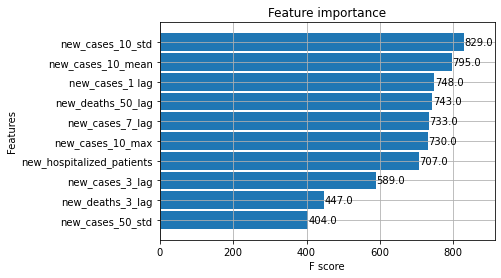

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

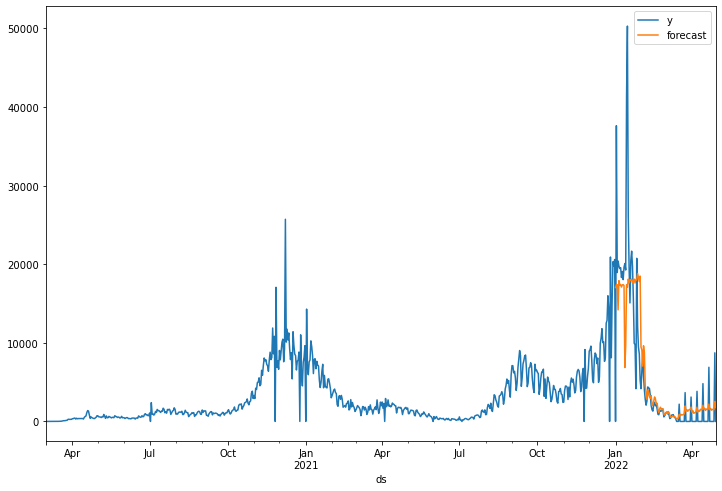

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

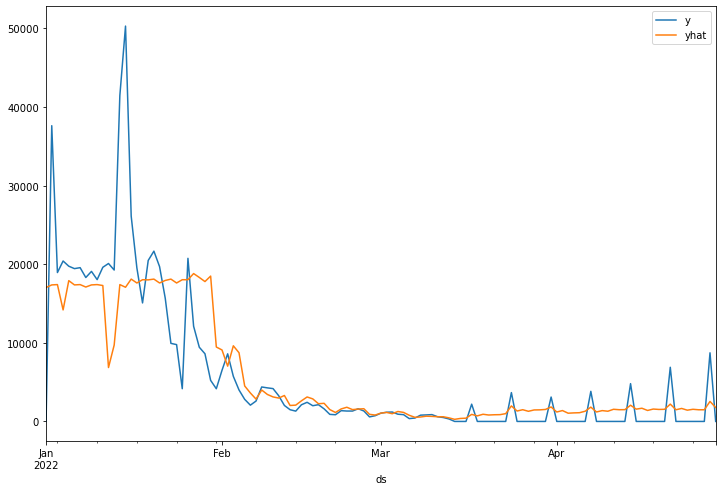

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  5624.820476236903
Test MAE:  2820.7413873752625
MASE =  1.1936434775337312


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

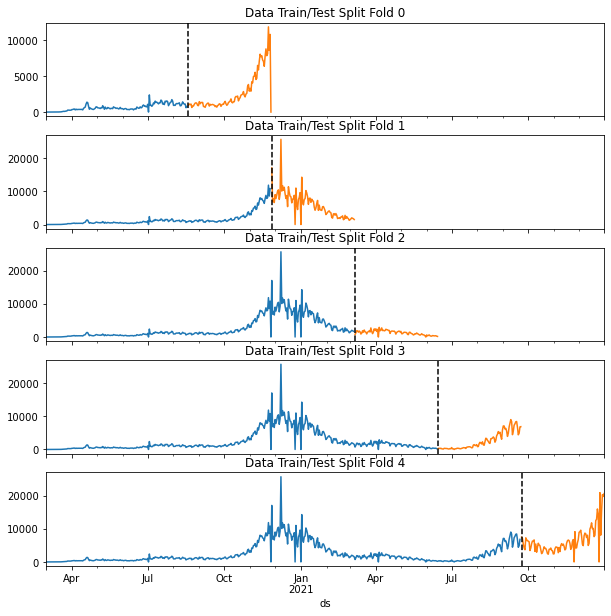

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:48:07] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4526.76424	validation_1-rmse:10802.96722
[100]	validation_0-rmse:2033.72808	validation_1-rmse:6480.31414
[200]	validation_0-rmse:1174.42496	validation_1-rmse:5401.29493
[300]	validation_0-rmse:851.55468	validation_1-rmse:5245.17818
[356]	validation_0-rmse:768.71046	validation_1-rmse:5244.17998
[19:48:07] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4526.76424	validation_1-rmse:10802.96722
[100]	validation_0-rmse:2033.72808	validation_1-rmse:6480.31414
[200]	validation_0-rmse:1174.42496	validation_1-rmse:5401.29493
[300]	validation_0-rmse:851.55468	validation_1-rmse:5245.17818
[357]	validation_0-rmse:767.63820	validation_1-rmse:5247.10213
[19:48:08] WARNI

<AxesSubplot:xlabel='ds'>

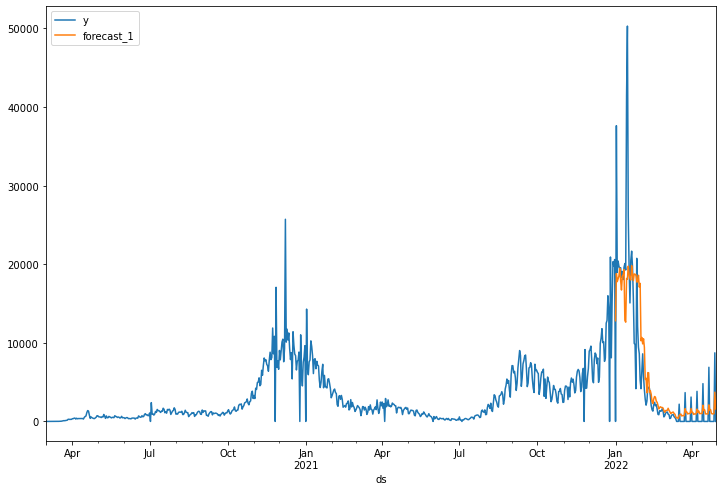

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

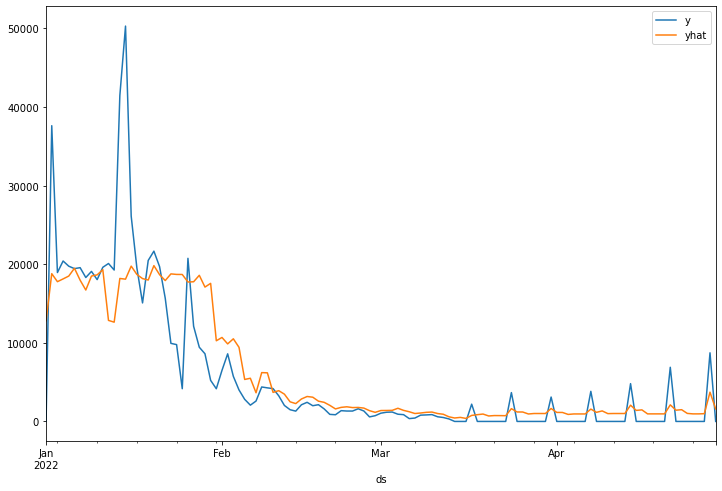

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast_1'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast_1'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast_1']))

Test RMSE:  5228.1385796040395
Test MAE:  2609.867899662306
MASE =  1.1044088655555033
